## Model training and results ##

Helper functions

In [2]:
import pandas as pd
import numpy as np

In [26]:
def load_data(dataset_path):
    dataset = pd.read_csv(dataset_path)
    X = dataset['text']
    Y = dataset['sentiment']
    return X, Y

In [22]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def train_model(dataset_path):
    X, Y = load_data(dataset_path)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, train_size=0.6)

    countVectorizer = CountVectorizer()
    X_train = countVectorizer.fit_transform(X_train)

    tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
    X_train = tf_transformer.transform(X_train)

    return X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer

In [23]:
from sklearn import metrics

def test_model(clf, X_test, Y_test, countVectorizer, tf_transformer):
    X_new_counts = countVectorizer.transform(X_test)
    X_new_tfidf = tf_transformer.transform(X_new_counts)
    predicted = clf.predict(X_new_tfidf)
    classification_report = metrics.classification_report(Y_test, predicted)
    print(classification_report)
    return classification_report

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(clf, X_test, Y_test, title, countVectorizer, tf_transformer):
    X_new_counts = countVectorizer.transform(X_test)
    X_new_tfidf = tf_transformer.transform(X_new_counts)
    y_pred = clf.predict(X_new_tfidf)
    cm = confusion_matrix(Y_test, y_pred)
    plt.matshow(cm)
    plt.title(title, y=1.2)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # use positive, negative, neutral as labels
    labels = ['negative', 'neutral', 'positive']
    plt.xticks([0, 1, 2], labels)
    plt.yticks([0, 1, 2], labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s="{:.1%}".format(cm[i, j]/np.sum(cm[i, :])), va='center', ha='center', color='white')
    # save the plot as a png file
    plt.savefig(title + '.png')
    plt.show()

In [25]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(clf, X_train, Y_train, model_name):
    # plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel(model_name + " Model Learning Curve")
    plt.ylabel("Score")
    plt.legend(loc="best")
    # save plot
    plt.savefig(model_name + " Learning Curve.png")
    plt.show()

### Train models on the smaller Fifa Tweets Dataset to determine the best classifier to use. ###

In [7]:
fifa_dataset_path = 'en_fifa_df.csv'

##### KNN (The classifier we used originally) #####

              precision    recall  f1-score   support

    negative       0.54      0.52      0.53      2281
     neutral       0.58      0.54      0.56      3188
    positive       0.60      0.66      0.63      3251

    accuracy                           0.58      8720
   macro avg       0.57      0.57      0.57      8720
weighted avg       0.58      0.58      0.58      8720



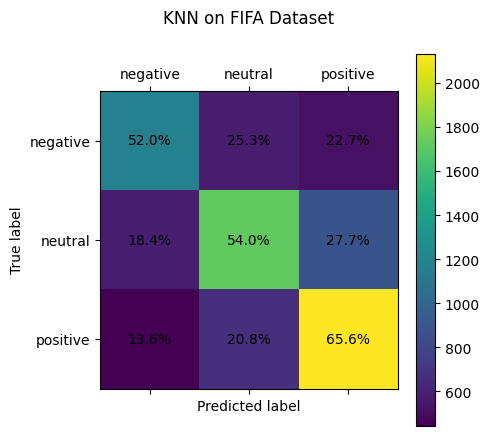

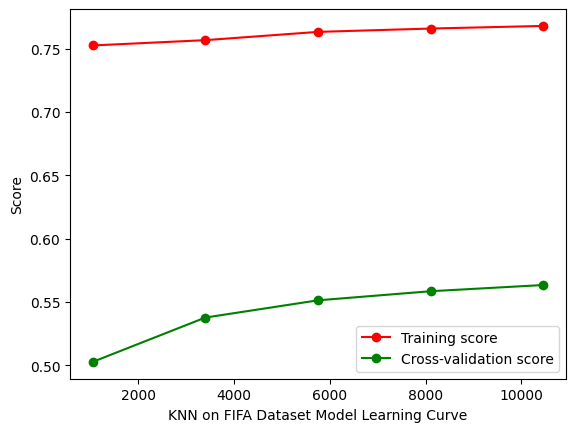

In [8]:
from sklearn.neighbors import KNeighborsClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_knn_fifa = KNeighborsClassifier(3).fit(X_train, Y_train)

test_model(clf_knn_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_knn_fifa, X_test, Y_test, 'KNN on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_knn_fifa, X_train, Y_train, 'KNN on FIFA Dataset')

##### Support Vector Machine #####

In [9]:
from sklearn.svm import SVC

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)
clf_svm_fifa = SVC().fit(X_train, Y_train)

In [10]:
svm_fifa_report = test_model(clf_svm_fifa, X_test, Y_test, countVectorizer, tf_transformer)

              precision    recall  f1-score   support

    negative       0.71      0.71      0.71      2281
     neutral       0.67      0.67      0.67      3188
    positive       0.75      0.76      0.76      3251

    accuracy                           0.71      8720
   macro avg       0.71      0.71      0.71      8720
weighted avg       0.71      0.71      0.71      8720



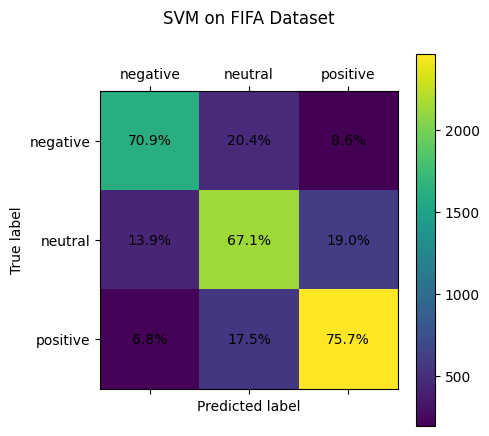

In [11]:
plot_confusion_matrix(clf_svm_fifa, X_test, Y_test, 'SVM on FIFA Dataset', countVectorizer, tf_transformer)

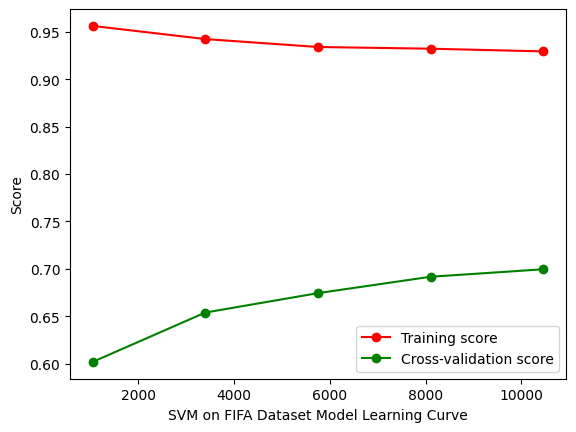

In [12]:
plot_learning_curve(clf_svm_fifa, X_train, Y_train, 'SVM on FIFA Dataset')

##### Random Forest #####

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_rf_fifa = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, Y_train)

rf_fifa_report = test_model(clf_rf_fifa, X_test, Y_test, countVectorizer, tf_transformer)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      2281
     neutral       0.65      0.11      0.19      3188
    positive       0.39      0.97      0.55      3251

    accuracy                           0.40      8720
   macro avg       0.35      0.36      0.25      8720
weighted avg       0.38      0.40      0.27      8720



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

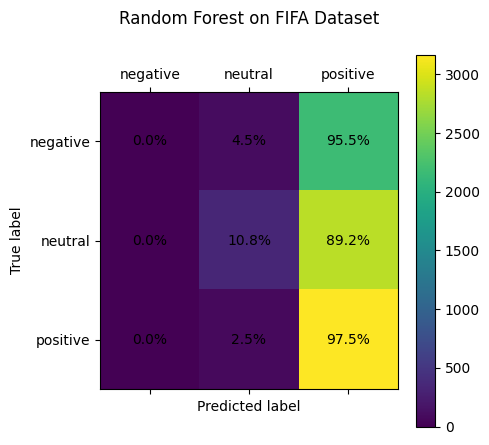

In [14]:
plot_confusion_matrix(clf_rf_fifa, X_test, Y_test, 'Random Forest on FIFA Dataset', countVectorizer, tf_transformer)

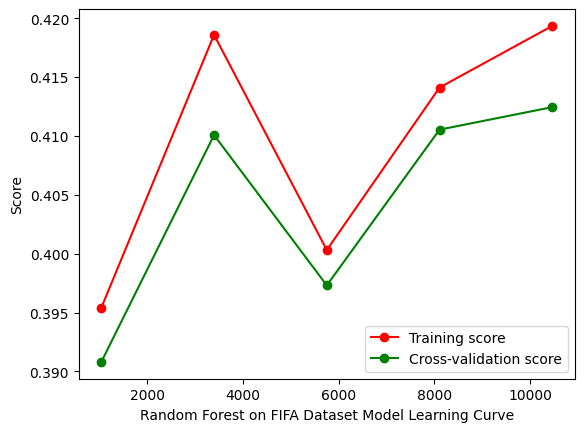

In [15]:
plot_learning_curve(clf_rf_fifa, X_train, Y_train, 'Random Forest on FIFA Dataset')

##### Logistic Regression #####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.72      0.69      0.71      2281
     neutral       0.67      0.66      0.66      3188
    positive       0.73      0.77      0.75      3251

    accuracy                           0.71      8720
   macro avg       0.71      0.71      0.71      8720
weighted avg       0.71      0.71      0.71      8720



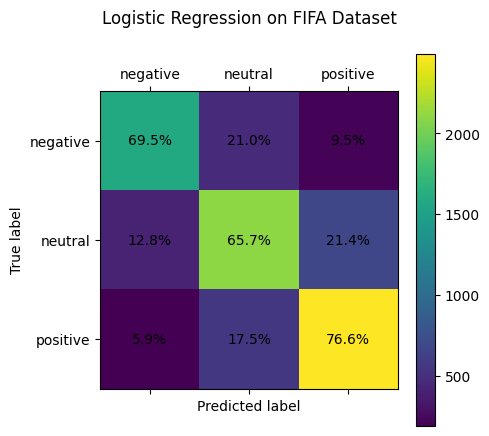

In [16]:
from sklearn.linear_model import LogisticRegression

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_lr_fifa = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, Y_train)

lr_fifa_report = test_model(clf_lr_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_lr_fifa, X_test, Y_test, 'Logistic Regression on FIFA Dataset', countVectorizer, tf_transformer)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

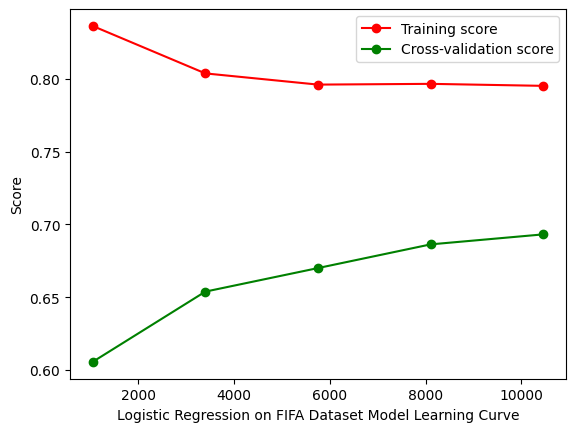

In [17]:
plot_learning_curve(clf_lr_fifa, X_train, Y_train, 'Logistic Regression on FIFA Dataset')

##### Decision Tree #####

              precision    recall  f1-score   support

    negative       0.55      0.54      0.55      2281
     neutral       0.55      0.56      0.55      3188
    positive       0.61      0.62      0.62      3251

    accuracy                           0.57      8720
   macro avg       0.57      0.57      0.57      8720
weighted avg       0.57      0.57      0.57      8720



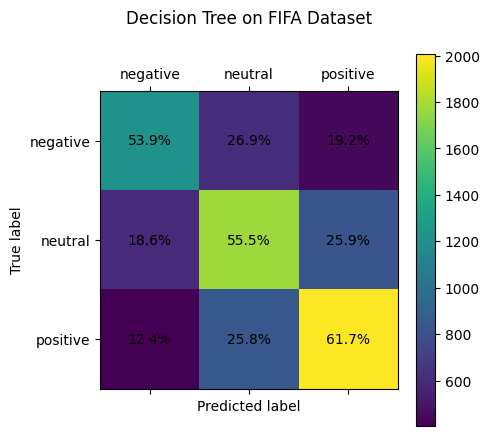

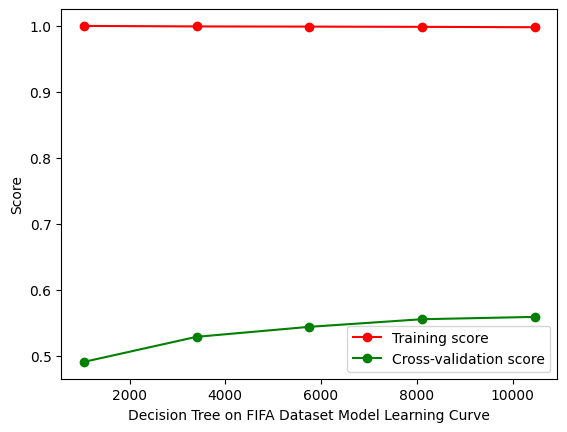

In [18]:
from sklearn.tree import DecisionTreeClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)
clf_dt_fifa = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)

dt_fifa_report = test_model(clf_dt_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_dt_fifa, X_test, Y_test, 'Decision Tree on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_dt_fifa, X_train, Y_train, 'Decision Tree on FIFA Dataset')

##### Perceptron #####

              precision    recall  f1-score   support

    negative       0.72      0.68      0.70      2281
     neutral       0.65      0.64      0.64      3188
    positive       0.72      0.76      0.74      3251

    accuracy                           0.69      8720
   macro avg       0.70      0.69      0.69      8720
weighted avg       0.69      0.69      0.69      8720



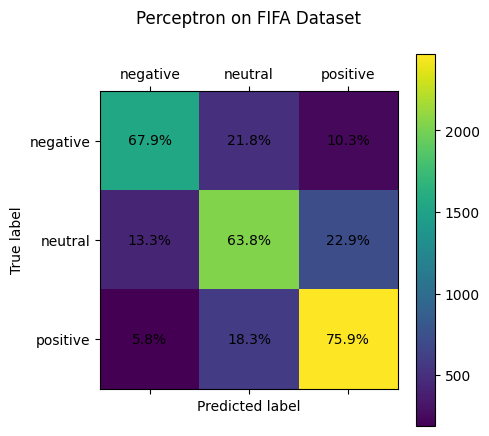

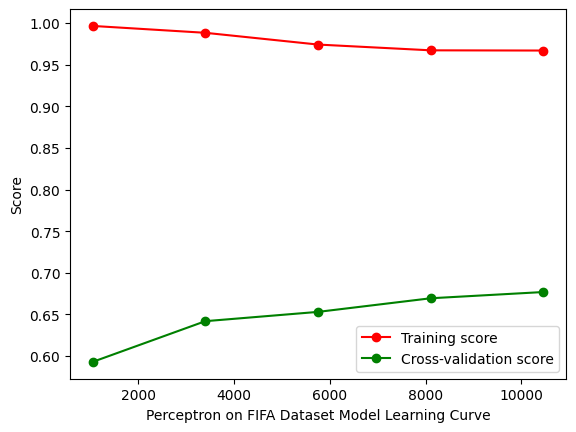

In [19]:
from sklearn.linear_model import Perceptron

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_ptr_fifa = Perceptron(tol=1e-3, random_state=0).fit(X_train, Y_train)

ptr_fifa_report = test_model(clf_ptr_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_ptr_fifa, X_test, Y_test, 'Perceptron on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_ptr_fifa, X_train, Y_train, 'Perceptron on FIFA Dataset')

##### SGD #####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.74      0.67      0.70      2281
     neutral       0.67      0.64      0.65      3188
    positive       0.71      0.79      0.75      3251

    accuracy                           0.70      8720
   macro avg       0.71      0.70      0.70      8720
weighted avg       0.70      0.70      0.70      8720



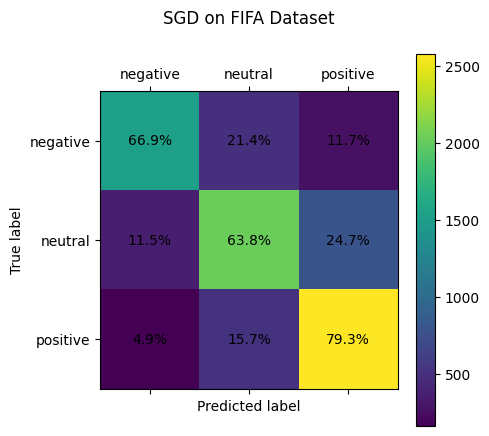

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reache

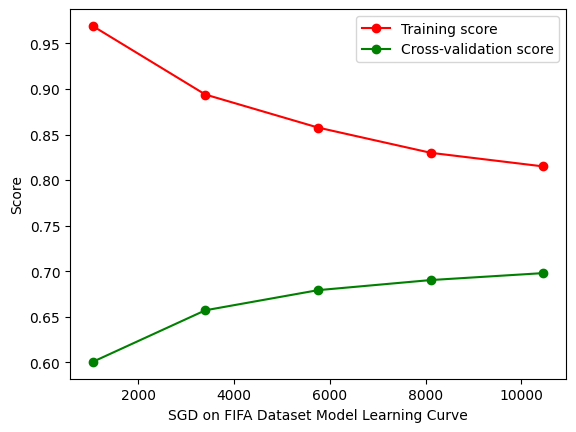

In [20]:
from sklearn.linear_model import SGDClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_sdg_fifa = SGDClassifier(loss="hinge", penalty="l2", max_iter=5).fit(X_train, Y_train)

sdg_fifa_report = test_model(clf_sdg_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_sdg_fifa, X_test, Y_test, 'SGD on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_sdg_fifa, X_train, Y_train, 'SGD on FIFA Dataset')

##### Neural Network #####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

    negative       0.70      0.70      0.70      2281
     neutral       0.48      0.51      0.50      3188
    positive       0.63      0.59      0.61      3251

    accuracy                           0.59      8720
   macro avg       0.61      0.60      0.60      8720
weighted avg       0.60      0.59      0.59      8720



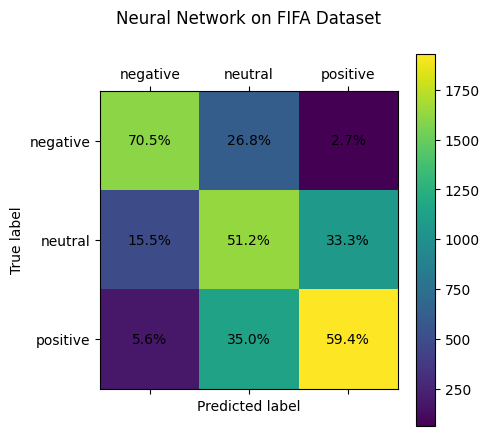

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

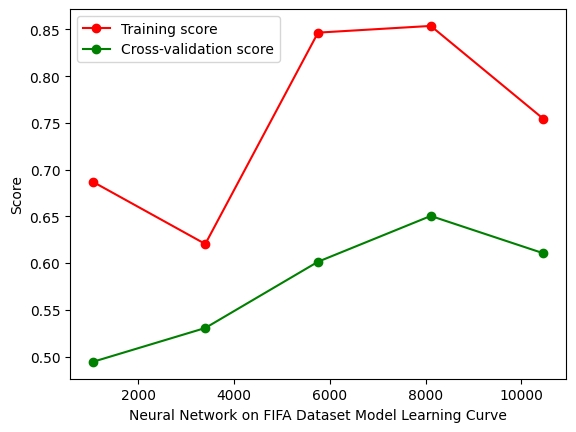

In [21]:
from sklearn.neural_network import MLPClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_nn_fifa = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, Y_train)

nn_fifa_report = test_model(clf_nn_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_nn_fifa, X_test, Y_test, 'Neural Network on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_nn_fifa, X_train, Y_train, 'Neural Network on FIFA Dataset')

##### Gradient Boosting #####

              precision    recall  f1-score   support

    negative       0.72      0.63      0.67      2281
     neutral       0.62      0.67      0.65      3188
    positive       0.71      0.72      0.71      3251

    accuracy                           0.68      8720
   macro avg       0.69      0.67      0.68      8720
weighted avg       0.68      0.68      0.68      8720



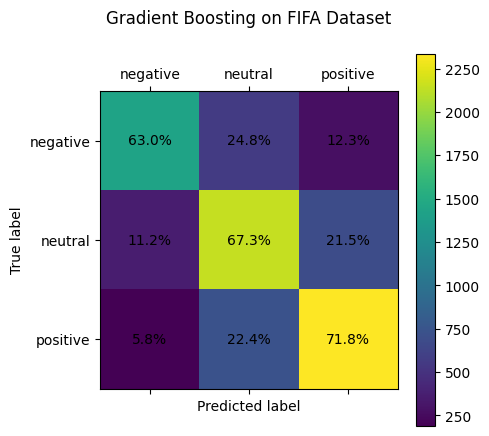

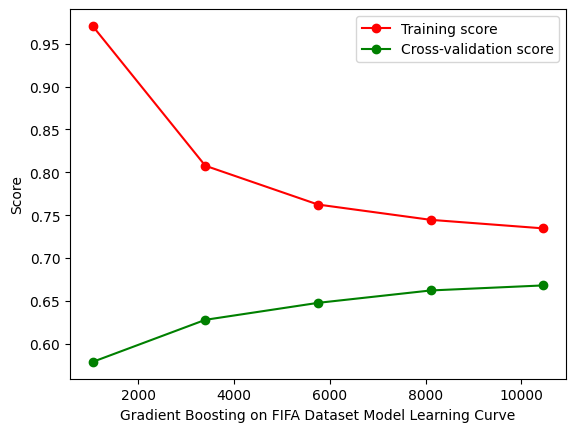

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_gb_fifa = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)

gb_fifa_report = test_model(clf_gb_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_gb_fifa, X_test, Y_test, 'Gradient Boosting on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_gb_fifa, X_train, Y_train, 'Gradient Boosting on FIFA Dataset')

##### Adaboost #####

              precision    recall  f1-score   support

    negative       0.68      0.60      0.64      2281
     neutral       0.56      0.68      0.61      3188
    positive       0.71      0.62      0.66      3251

    accuracy                           0.64      8720
   macro avg       0.65      0.63      0.64      8720
weighted avg       0.65      0.64      0.64      8720



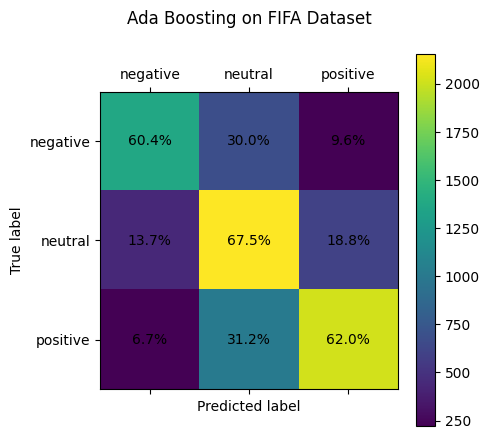

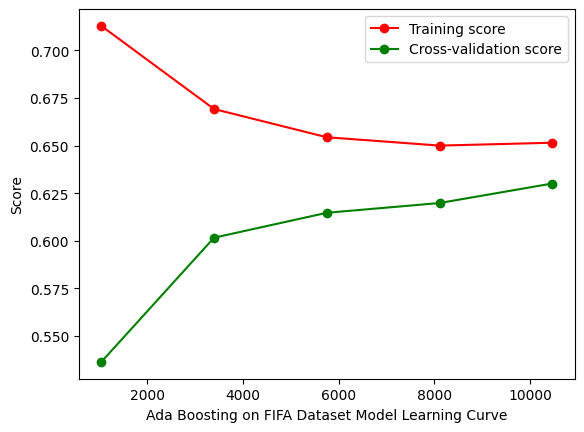

In [23]:
from sklearn.ensemble import AdaBoostClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_ab_fifa = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, Y_train)

ab_fifa_report = test_model(clf_ab_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_ab_fifa, X_test, Y_test, 'Ada Boosting on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_ab_fifa, X_train, Y_train, 'Ada Boosting on FIFA Dataset')

##### Naive Bayes #####

              precision    recall  f1-score   support

    negative       0.77      0.51      0.61      2281
     neutral       0.64      0.60      0.62      3188
    positive       0.65      0.84      0.73      3251

    accuracy                           0.67      8720
   macro avg       0.68      0.65      0.65      8720
weighted avg       0.68      0.67      0.66      8720



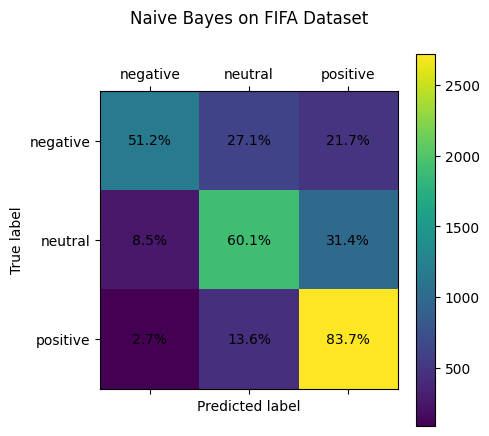

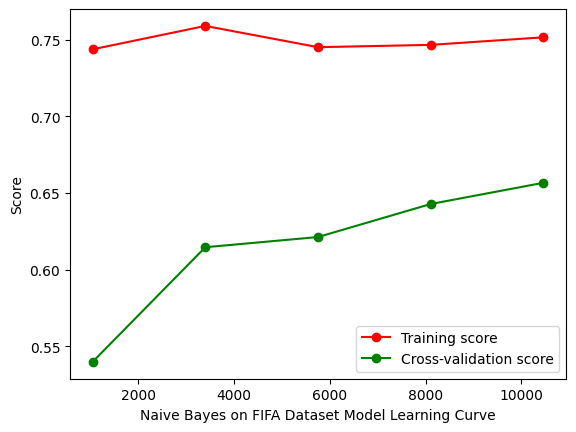

In [24]:
from sklearn.naive_bayes import MultinomialNB

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_nb_fifa = MultinomialNB().fit(X_train, Y_train)

nb_fifa_report = test_model(clf_nb_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_nb_fifa, X_test, Y_test, 'Naive Bayes on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_nb_fifa, X_train, Y_train, 'Naive Bayes on FIFA Dataset')

##### Linear SVM #####

              precision    recall  f1-score   support

    negative       0.74      0.73      0.74      2281
     neutral       0.69      0.67      0.68      3188
    positive       0.75      0.78      0.77      3251

    accuracy                           0.73      8720
   macro avg       0.73      0.73      0.73      8720
weighted avg       0.73      0.73      0.73      8720



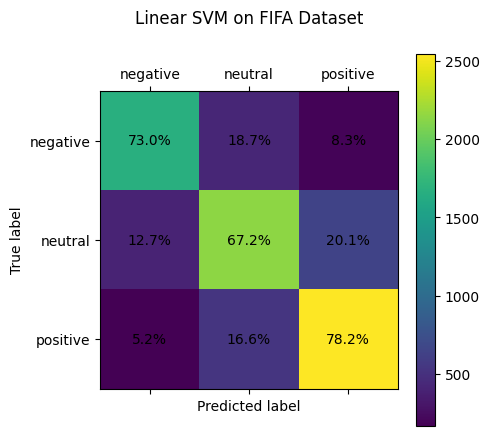

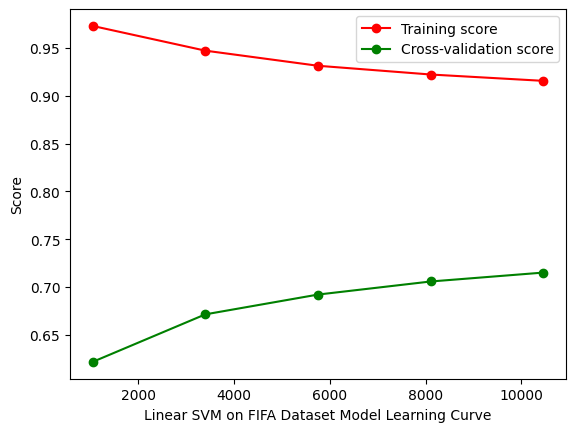

In [25]:
from sklearn.svm import LinearSVC

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(fifa_dataset_path)

clf_lsvm_fifa = LinearSVC(random_state=0, tol=1e-5).fit(X_train, Y_train)

lsvm_fifa_report = test_model(clf_lsvm_fifa, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_lsvm_fifa, X_test, Y_test, 'Linear SVM on FIFA Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_lsvm_fifa, X_train, Y_train, 'Linear SVM on FIFA Dataset')

Combine the above results

In [1]:
# combine learning curve and confusion matrix for all models
# models:
# 1. KNN
# 2. SVM
# 3. Random Forest
# 4. Logistic Regression
# 5. Decision Tree
# 6. Perceptron
# 7. SGD
# 8. Neural Network
# 9. Gradient Boosting
# 10. Adaboost
# 11. Naive Bayes
# 12. Linear SVM

from matplotlib import pyplot as plt

knn_learning_curve = plt.imread('KNN on FIFA Dataset Learning Curve.png')
knn_confusion_matrix = plt.imread('KNN on FIFA Dataset.png')

svm_learning_curve = plt.imread('SVM on FIFA Dataset Learning Curve.png')
svm_confusion_matrix = plt.imread('SVM on FIFA Dataset.png')

rf_learning_curve = plt.imread('Random Forest on FIFA Dataset Learning Curve.png')
rf_confusion_matrix = plt.imread('Random Forest on FIFA Dataset.png')

lr_learning_curve = plt.imread('Logistic Regression on FIFA Dataset Learning Curve.png')
lr_confusion_matrix = plt.imread('Logistic Regression on FIFA Dataset.png')

dt_learning_curve = plt.imread('Decision Tree on FIFA Dataset Learning Curve.png')
dt_confusion_matrix = plt.imread('Decision Tree on FIFA Dataset.png')

ptr_learning_curve = plt.imread('Perceptron on FIFA Dataset Learning Curve.png')
ptr_confusion_matrix = plt.imread('Perceptron on FIFA Dataset.png')

sdg_learning_curve = plt.imread('SGD on FIFA Dataset Learning Curve.png')
sdg_confusion_matrix = plt.imread('SGD on FIFA Dataset.png')

nn_learning_curve = plt.imread('Neural Network on FIFA Dataset Learning Curve.png')
nn_confusion_matrix = plt.imread('Neural Network on FIFA Dataset.png')

gb_learning_curve = plt.imread('Gradient Boosting on FIFA Dataset Learning Curve.png')
gb_confusion_matrix = plt.imread('Gradient Boosting on FIFA Dataset.png')

ab_learning_curve = plt.imread('Ada Boosting on FIFA Dataset Learning Curve.png')
ab_confusion_matrix = plt.imread('Ada Boosting on FIFA Dataset.png')

nb_learning_curve = plt.imread('Naive Bayes on FIFA Dataset Learning Curve.png')
nb_confusion_matrix = plt.imread('Naive Bayes on FIFA Dataset.png')

lsvm_learning_curve = plt.imread('Linear SVM on FIFA Dataset Learning Curve.png')
lsvm_confusion_matrix = plt.imread('Linear SVM on FIFA Dataset.png')


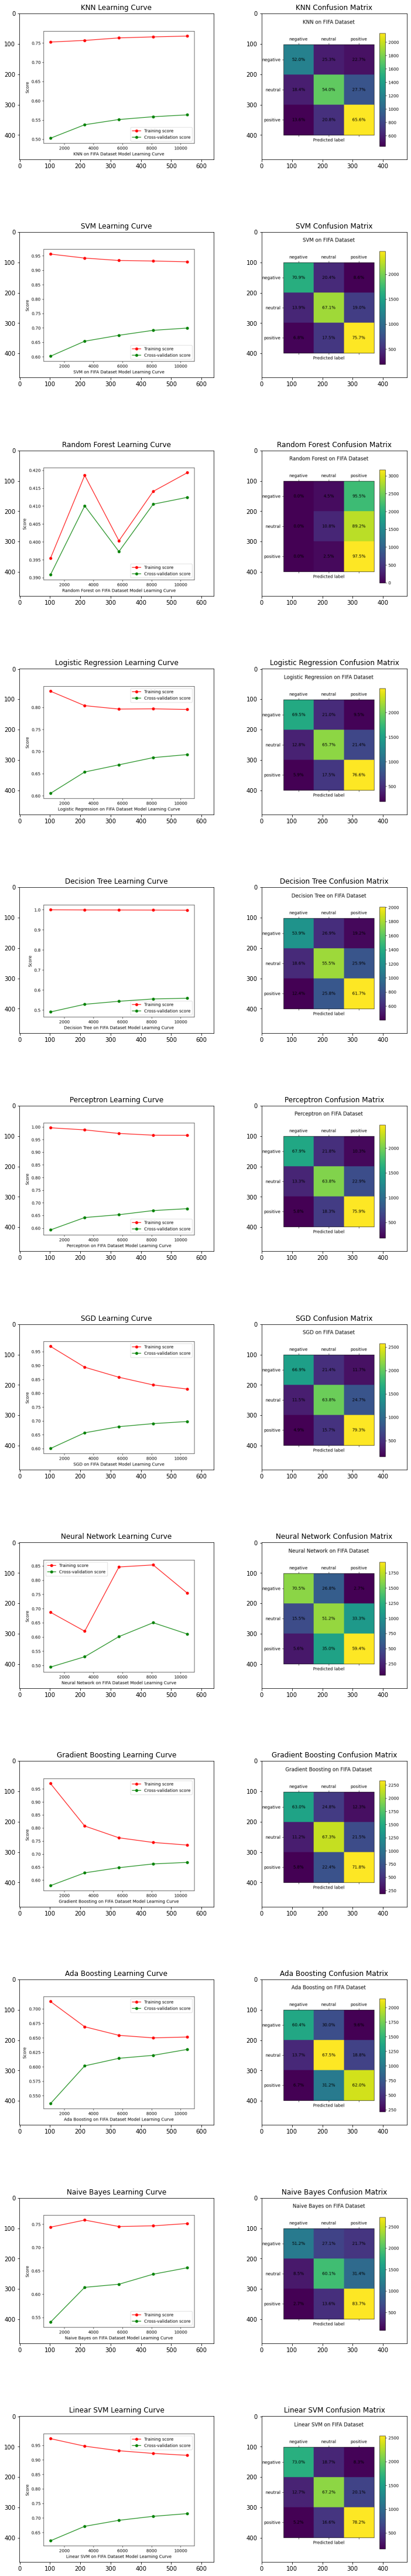

In [3]:
fig, axs = plt.subplots(12, 2, figsize=(20, 80))

axs[0, 0].imshow(knn_learning_curve)
axs[0, 0].set_title('KNN Learning Curve')
axs[0, 1].imshow(knn_confusion_matrix)
axs[0, 1].set_title('KNN Confusion Matrix')

axs[1, 0].imshow(svm_learning_curve)
axs[1, 0].set_title('SVM Learning Curve')
axs[1, 1].imshow(svm_confusion_matrix)
axs[1, 1].set_title('SVM Confusion Matrix')

axs[2, 0].imshow(rf_learning_curve)
axs[2, 0].set_title('Random Forest Learning Curve')
axs[2, 1].imshow(rf_confusion_matrix)
axs[2, 1].set_title('Random Forest Confusion Matrix')

axs[3, 0].imshow(lr_learning_curve)
axs[3, 0].set_title('Logistic Regression Learning Curve')
axs[3, 1].imshow(lr_confusion_matrix)
axs[3, 1].set_title('Logistic Regression Confusion Matrix')

axs[4, 0].imshow(dt_learning_curve)
axs[4, 0].set_title('Decision Tree Learning Curve')
axs[4, 1].imshow(dt_confusion_matrix)
axs[4, 1].set_title('Decision Tree Confusion Matrix')

axs[5, 0].imshow(ptr_learning_curve)
axs[5, 0].set_title('Perceptron Learning Curve')
axs[5, 1].imshow(ptr_confusion_matrix)
axs[5, 1].set_title('Perceptron Confusion Matrix')

axs[6, 0].imshow(sdg_learning_curve)
axs[6, 0].set_title('SGD Learning Curve')
axs[6, 1].imshow(sdg_confusion_matrix)
axs[6, 1].set_title('SGD Confusion Matrix')

axs[7, 0].imshow(nn_learning_curve)
axs[7, 0].set_title('Neural Network Learning Curve')
axs[7, 1].imshow(nn_confusion_matrix)
axs[7, 1].set_title('Neural Network Confusion Matrix')

axs[8, 0].imshow(gb_learning_curve)
axs[8, 0].set_title('Gradient Boosting Learning Curve')
axs[8, 1].imshow(gb_confusion_matrix)
axs[8, 1].set_title('Gradient Boosting Confusion Matrix')

axs[9, 0].imshow(ab_learning_curve)
axs[9, 0].set_title('Ada Boosting Learning Curve')
axs[9, 1].imshow(ab_confusion_matrix)
axs[9, 1].set_title('Ada Boosting Confusion Matrix')

axs[10, 0].imshow(nb_learning_curve)
axs[10, 0].set_title('Naive Bayes Learning Curve')
axs[10, 1].imshow(nb_confusion_matrix)
axs[10, 1].set_title('Naive Bayes Confusion Matrix')

axs[11, 0].imshow(lsvm_learning_curve)
axs[11, 0].set_title('Linear SVM Learning Curve')
axs[11, 1].imshow(lsvm_confusion_matrix)
axs[11, 1].set_title('Linear SVM Confusion Matrix')

# reduce the space between subplots
fig.subplots_adjust(hspace=0.5, wspace=-0.5)

# save the figure
fig.savefig('Trained Model Visualisations.png')

plt.show()

### Train the models on Climate Change Dataset ###

From the above trained models, we can see SVM, SGD, Logistic Regression and Linear SVM have the highest accuracies. 

In [20]:
climate_dataset_path = 'en_climate_df.csv'

##### SVM #####

In [32]:
from sklearn.svm import SVC

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(climate_dataset_path)
clf_svm_climate = SVC().fit(X_train, Y_train)

svm_climate_report = test_model(clf_svm_climate, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_svm_climate, X_test, Y_test, 'SVM on Climate Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_svm_climate, X_train, Y_train, 'SVM on Climate Dataset')

##### SGD #####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.74      0.75      0.75     18436
     neutral       0.82      0.24      0.37      2715
    positive       0.73      0.79      0.76     17949

    accuracy                           0.74     39100
   macro avg       0.76      0.60      0.63     39100
weighted avg       0.74      0.74      0.73     39100



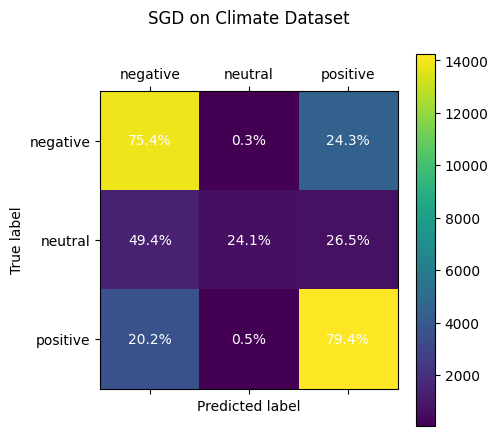

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reache

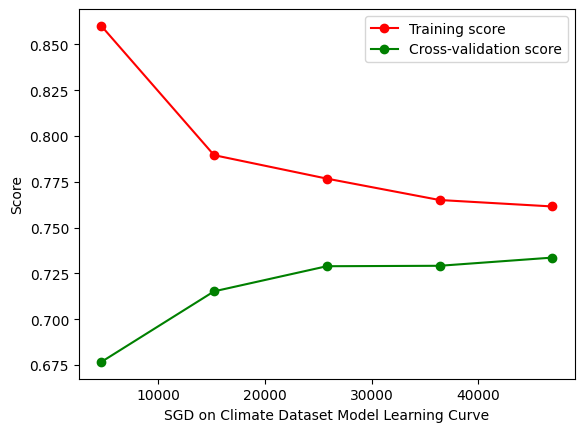

In [31]:
from sklearn.linear_model import SGDClassifier

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(climate_dataset_path)

clf_sdg_climate = SGDClassifier(loss="hinge", penalty="l2", max_iter=5).fit(X_train, Y_train)

sdg_climate_report = test_model(clf_sdg_climate, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_sdg_climate, X_test, Y_test, 'SGD on Climate Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_sdg_climate, X_train, Y_train, 'SGD on Climate Dataset')

##### Logistic Regression #####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.78      0.80      0.79     18436
     neutral       0.74      0.51      0.61      2715
    positive       0.78      0.81      0.80     17949

    accuracy                           0.78     39100
   macro avg       0.77      0.70      0.73     39100
weighted avg       0.78      0.78      0.78     39100



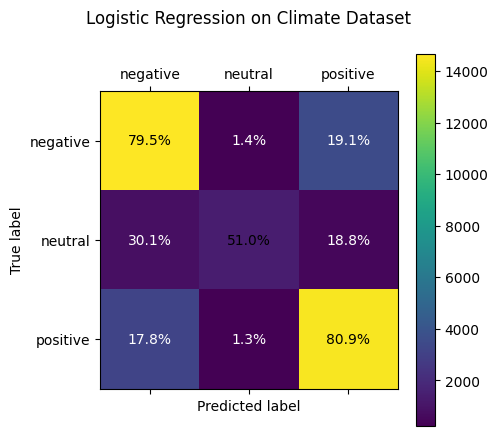

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

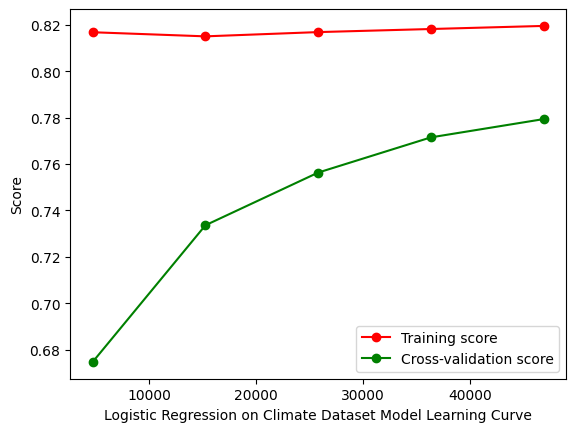

In [29]:
from sklearn.linear_model import LogisticRegression

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(climate_dataset_path)

clf_lr_climate = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, Y_train)

lr_climate_report = test_model(clf_lr_climate, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_lr_climate, X_test, Y_test, 'Logistic Regression on Climate Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_lr_climate, X_train, Y_train, 'Logistic Regression on Climate Dataset')

##### Linear SVM #####

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82     18436
     neutral       0.84      0.66      0.74      2715
    positive       0.81      0.84      0.82     17949

    accuracy                           0.82     39100
   macro avg       0.82      0.77      0.79     39100
weighted avg       0.82      0.82      0.82     39100



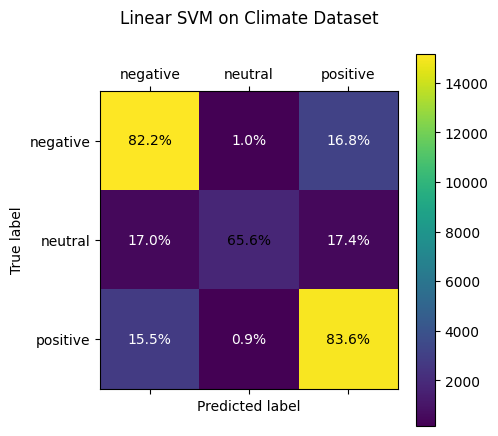

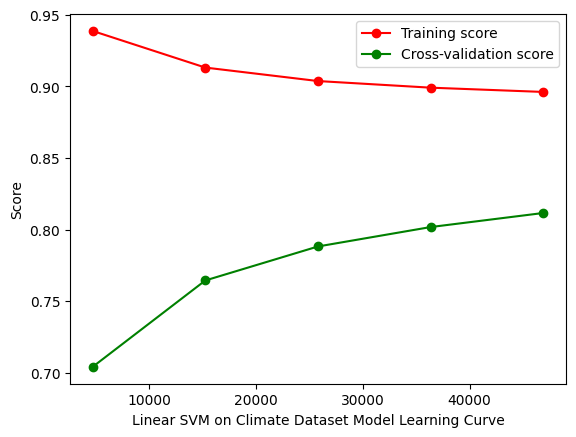

In [28]:
from sklearn.svm import LinearSVC

X_train, Y_train, X_test, Y_test, countVectorizer, tf_transformer = train_model(climate_dataset_path)

clf_lsvm_climate = LinearSVC(random_state=0, tol=1e-5).fit(X_train, Y_train)

lsvm_climate_report = test_model(clf_lsvm_climate, X_test, Y_test, countVectorizer, tf_transformer)

plot_confusion_matrix(clf_lsvm_climate, X_test, Y_test, 'Linear SVM on Climate Dataset', countVectorizer, tf_transformer)

plot_learning_curve(clf_lsvm_climate, X_train, Y_train, 'Linear SVM on Climate Dataset')

In [12]:
dataset = pd.read_csv('en_climate_df.csv')

X = dataset['text']
Y = dataset['sentiment']

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, train_size=0.6)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

countVectorizer = CountVectorizer()
X_train = countVectorizer.fit_transform(X_train)

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train = tf_transformer.transform(X_train)

# use linear support vector machine
from sklearn.svm import LinearSVC
clf_lsvm_climate = LinearSVC(random_state=0, tol=1e-5).fit(X_train, Y_train)

In [14]:
lsvm_climate_report = test_model(clf_lsvm_climate, X_test, Y_test, countVectorizer, tf_transformer)

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82     18436
     neutral       0.84      0.66      0.74      2715
    positive       0.81      0.84      0.82     17949

    accuracy                           0.82     39100
   macro avg       0.82      0.77      0.79     39100
weighted avg       0.82      0.82      0.82     39100



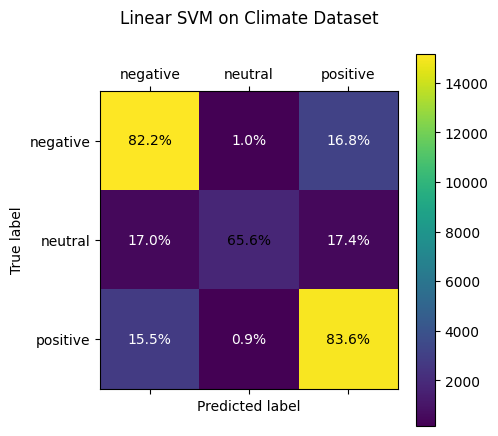

In [17]:
plot_confusion_matrix(clf_lsvm_climate, X_test, Y_test, 'Linear SVM on Climate Dataset', countVectorizer, tf_transformer)

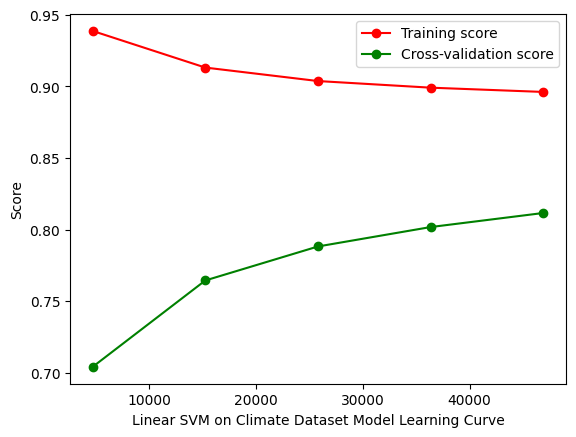

In [27]:
plot_learning_curve(clf_lsvm_climate, X_train, Y_train, 'Linear SVM on Climate Dataset')